In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
import skimage.filters
import skimage.transform
import scipy
import numpy as np
import sklearn

from pydash import py_

from cad.metrics import geometry, exposure

In [2]:
img = skimage.io.imread('/d/blimp/f1.jpg')
eim = exposure.equalize(img)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


<IPython.core.display.Javascript object>


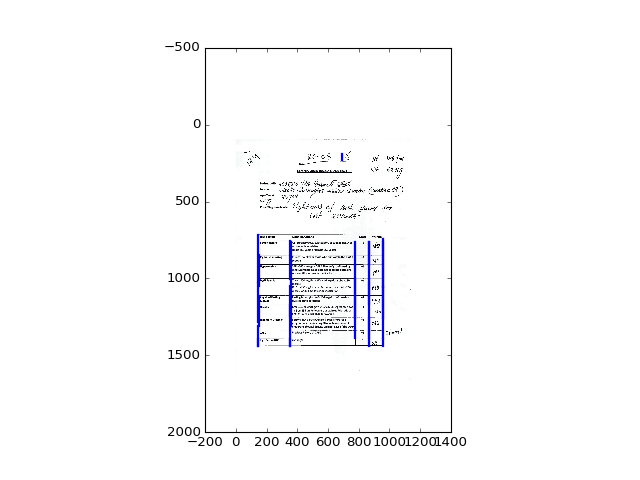

In [3]:
axis = 0

segs = geometry._filter_lines(eim, axis=axis, length=40, gap=0.5, sigma=1, threshold=50)

lines = geometry.infer_lines_span(segs, axis=axis)

plt.imshow(eim, cmap=plt.cm.bone)


for l in lines:
  a, b = l
  plt.plot(*zip(a, b), 'b', linewidth=2)

<IPython.core.display.Javascript object>


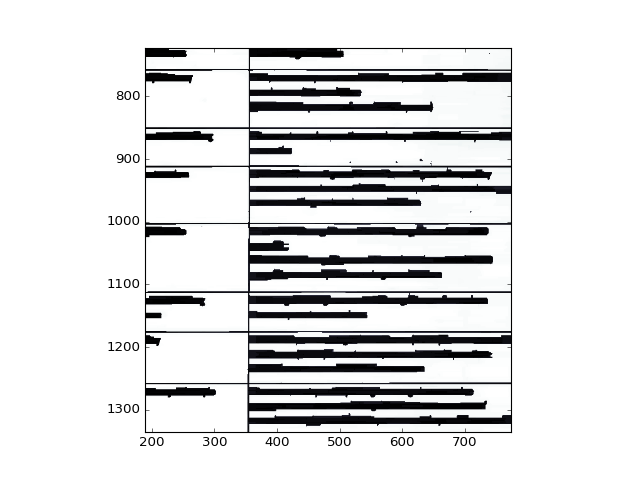

In [124]:
se = skimage.morphology.rectangle(3, 30, dtype='float64')
op = skimage.morphology.opening(eim, se)


plt.imshow(op, cmap=plt.cm.bone)